In [21]:
import sys 
sys.path.append(r"C:\Users\a-sochat\development\Qcodes_Sohail_Clone\Qcodes")

import numpy as np

import qcodes as qc
from qcodes.instrument.parameter import ManualParameter
from qcodes.sweep import sweep, nest, chain, SweepMeasurement
from qcodes import ParamSpec, new_data_set, new_experiment, Station

from qcodes.dataset.plotting import plot_by_id

In [22]:
x = ManualParameter("x")
m = ManualParameter("m")
m.get = lambda: "{:.3}".format(np.random.uniform(0, 1))

sweep_object = nest(sweep(x, [0, 1, 2, 3]), m)

In [23]:
experiment = new_experiment("sweep_measure", sample_name="none")
station = Station()
meas = SweepMeasurement(exp=experiment, station=station)

In [24]:
with meas.run() as datasaver: 
    for data in sweep_object: 
        datasaver.addResult(data)
    
    dataid = datasaver.id  # convenient to have for plotting

Starting experimental run with id: 6


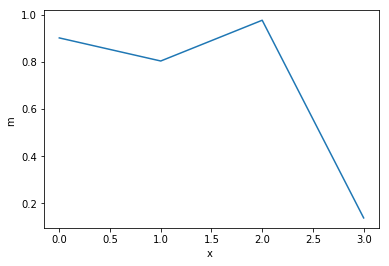

In [25]:
fig = plot_by_id(dataid)